In [1]:
import pandas as pd
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)
import OpenSSL.SSL
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = (10, 5)

# This import is needed to suppress warnings, not sure why thera are warnings.
import warnings
warnings.simplefilter('error')

# Set the context: Run computation on cpus
data_ctx = mx.cpu() # data
model_ctx = mx.cpu() # parameters

/Users/pia/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


## Deep Learning Demo

### Neural Networks

### Recurrent Neural Networks

### Optimization with Gradient Descent



### Deep Learning Framworks
* tensorflow
* Keras
* pytorch
* CNTK
* MXNet
* etc

### Linear Regression with MXNet
Estimate the parameters $\mathbf{w}$ and $b$ with a linear model of the form:
\begin{equation}
\hat{y} = \sum_{i=1}^n w_i x_i + b = \mathbf{w} \cdot \mathbf{X}^T + b
\end{equation}

To assess how well our predictions are with respect to the true targets we use the square loss:
\begin{equation}
L(y, \hat{y}) = \sum_{i=1}^n (\hat{y}_i - y_i)^2 
\end{equation}


Linear regression can be depicted as a Neural Network as in the picture below:

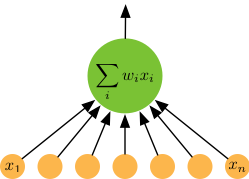

Image from MXNet: http://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-scratch.html

### Baby steps deep learning with MXNet
As an introduction to both MXNet and Deep Learning let's code a linear regression node from scratch.

We will be working with MXNet's NDArray data structure. It is very similar to numpy's multidimensional array, but with a few advantages.
* support for asynchronous computation on CPU, GPU and distributed architectures
* support for automatic differentiation

In [2]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(x):
    return 2 * x[:, 0] - 3.4 * x[:, 1] + 4.2

# ctx is the context
x = nd.random.normal(shape=(num_examples, num_inputs), ctx=data_ctx)
print('shape of x:', x.shape)
noise = 0.1 * nd.random_normal(shape=(num_examples, ), ctx=data_ctx)
y = real_fn(x) + noise
print('shape of y:', y.shape)
print(x[0])
print(y[0])

# Test that random points give predictions near the target,
# when using the optimal parameters
print('')
pred = 2 * x[0, 0] - 3.4 * x[0, 1] + 4.2
print('target', y[0])
print('prediction', pred)

shape of x: (10000, 2)
shape of y: (10000,)

[ 0.03629481 -0.49024421]
<NDArray 2 @cpu(0)>

[ 6.00964451]
<NDArray 1 @cpu(0)>

target 
[ 6.00964451]
<NDArray 1 @cpu(0)>
prediction 
[ 5.93941975]
<NDArray 1 @cpu(0)>


### Plotting one feature against the target

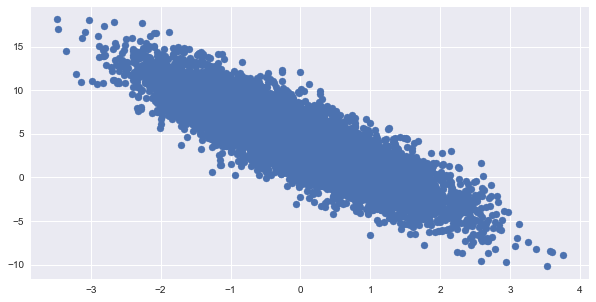

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1].asnumpy(), y.asnumpy())
plt.show()

### Data iterators
In order to use data iterators the data has to be loaded into an ArrayDataset instance. 
X can be multidimensional but they have to have equal length along the first dimension: `len(X) == len(y)`



In [4]:
# Shuffle data in this example
batch_size = 2**3
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(x, y),
                                  batch_size=batch_size, shuffle=True)
for i, (data, label) in enumerate(train_data):
    print(data, label)
    break


[[-1.06002414 -2.05984282]
 [ 1.03347099 -1.15839612]
 [-1.39372969  0.16479443]
 [-0.25413126 -1.043576  ]
 [-1.18039262 -0.41567659]
 [-0.58222842 -0.69938523]
 [-1.30456877 -1.66774189]
 [ 0.88696712  0.50141323]]
<NDArray 8x2 @cpu(0)> 
[  9.00439548  10.15337563   0.87967539   7.32060528   3.14356589
   5.47396421   7.22915649   4.15246964]
<NDArray 8 @cpu(0)>


In [5]:
# How many batches?
counter = 0
for i, (data, label) in enumerate(train_data):
    pass
print(i + 1)

1250


### Model parameters
The parameters are initialized on `model_ctx`

In [6]:
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [7]:
# Allocate memory for each gradient
for param in params:
    param.attach_grad()

## Neural networks
The function `net(x)` is just a representation of a linear neuron

In [8]:
def net(x):
    return mx.nd.dot(x, w) + b

## Loss function

In [9]:
def square_loss(yhat, y):
    return nd.mean((yhat - y)**2)

## Optimizer
Optimization done with gradient descent
* `param[:]` is used to update parameters in place!

In [10]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

## Training loop
* compute predictions for `yhat` and compute the loss
* compute gradients by invoking `loss.backward()`
* update model parameters

In [11]:
def plot_loss(losses, x, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(x[:sample_size, :].asnumpy(),
            net(x[:sample_size, :]).asnumpy(), 'or', 
             label='Estimated')
    fg2.plot(x[:sample_size, 1].asnumpy(),
            real_fn(x[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()
    

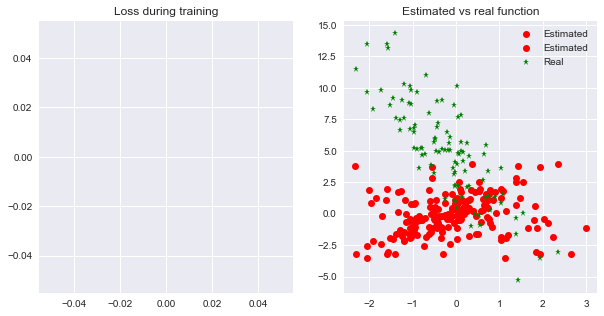

epoch: 0 cumulative loss: 9.194428581297398
epoch: 1 cumulative loss: 0.06995894983606413
epoch: 2 cumulative loss: 0.0105377222167328
epoch: 3 cumulative loss: 0.010180980382859707
epoch: 4 cumulative loss: 0.01018159866798669
epoch: 5 cumulative loss: 0.01018172974465415
epoch: 6 cumulative loss: 0.010178874773532152
epoch: 7 cumulative loss: 0.010180458793416619
epoch: 8 cumulative loss: 0.010182241263752802
epoch: 9 cumulative loss: 0.010181007182970643


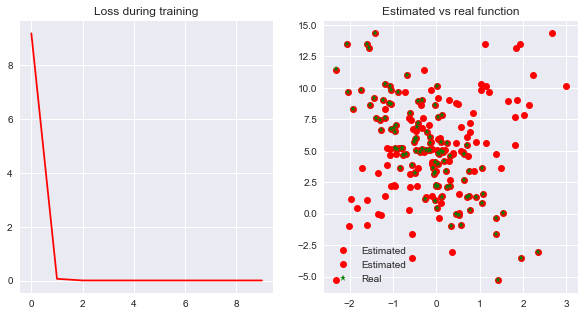

In [12]:
epochs = 10
learning_rate = 0.0001
num_batches = num_examples/batch_size
losses = []
plot_loss(losses, x)

for e in range(epochs):
    cumulative_loss = 0
    for _, (data, label) in enumerate(train_data):
        # check data and parameters in same context!
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    print('epoch: {} cumulative loss: {}'.format(e, 
                                          cumulative_loss/num_batches))
    losses.append(cumulative_loss/num_batches)
plot_loss(losses, x)


In [13]:
print('weights:', params[0].shape)
print(params[0])
print('')
print('bias:', params[1].shape)
print(params[1])

weights: (2, 1)

[[ 1.99862659]
 [-3.39792275]]
<NDArray 2x1 @cpu(0)>

bias: (1,)

[ 4.20256662]
<NDArray 1 @cpu(0)>


## Example from finance: Prediction of prices for next day
Data is loaded from tiingo, a platform for free and licensed financial data
Other vendors include QUANDL, QUANTOPIA ETC.

### Load and preprocess data

In [14]:
data = pd.read_csv('closing_prices_tiingo.csv', parse_dates=True, infer_datetime_format=True)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


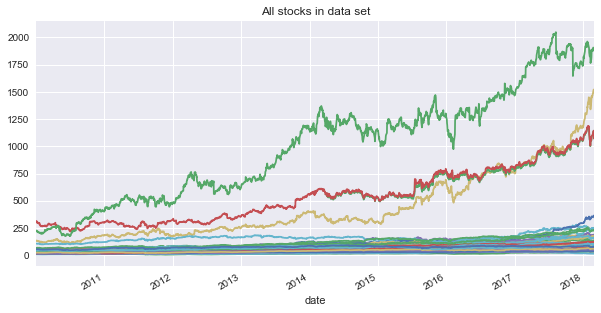

In [15]:
data.plot(legend=False, title='All stocks in data set')
plt.show()

In [16]:
aapl = data['AAPL']
aapl.head()

date
2010-01-04    27.294495
2010-01-05    27.341684
2010-01-06    26.906778
2010-01-07    26.857038
2010-01-08    27.035592
Name: AAPL, dtype: float64

## Plot the price data

In [17]:
def to_return(x, period=1):
    """ This function supposes that the input is a
    dataframe or series"""
    return (x - x.shift(periods=period, axis='index'))/x.shift(periods=period)

We are using the pandas API to plot(), pandas knows we are plotting a time series and sets the time axis automatically.


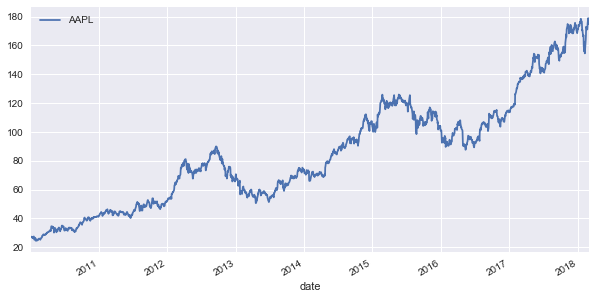

In [18]:
aapl.plot(legend=True)
plt.show()

Returns are computed as
\begin{equation}
R_{t+1} = \frac{P_{t+1}}{P_t} - 1
\end{equation}

date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: AAPL, dtype: float64
Shape of data: (2055,)


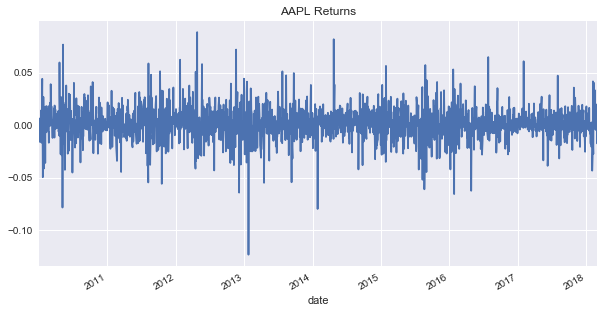

In [19]:
ret = to_return(aapl)
print(ret.head())
print('Shape of data: {}'.format(ret.shape))
ret.plot(title='AAPL Returns')
plt.show()

## Divide in training and test sets
* Because we are working with time series where order matters we will not randomize the data sets. 
* Randomization is otherwise done in data sets where the assumption of independent and identically distributed (i.i.d.) applies. 

Start by transforming data to a rolling window of x daily returns/prices, depending on the data to predict on. For example for a window of 30 days:
\begin{equation}
\{S_{t-29}, S_{t-28}, \dots, S_{t}\}
\end{equation}
where $t\geq 30$.

To recap: we use the rolling window to predict the $S_{t+1}$ prices as follows

\begin{equation}
S_{t + 1} = F_{\theta}(S_{t-29}, \dots, S_t)
\end{equation}

The machine learning task is to estimate the parameters $\theta = \{W_1, W_2, \dots, W_n\}$


In [20]:
def to_tensor(data, timesteps=30):
    x = np.array([data[i:i + timesteps]
                  for i in range(len(data) - timesteps)], dtype=float)
    return x

In [21]:
price_input = to_tensor(aapl, timesteps=31)
price_input.shape

(2024, 31)

In [22]:
# Get train and development sets
def get_train_dev(x, dev=0.85, to_return=False):
    if to_return:
        x = to_return(x)
    dev = int(dev * len(x))
    train = x.iloc[:dev, :]
    dev = x.iloc[dev:, :]
    return train, dev

In [23]:
x_

NameError: name 'x_' is not defined